In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(101)
x = np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)

In [5]:
y

array([-0.05153223,  0.07961995,  0.59363396,  0.2989893 ,  0.09485594,
        0.35875178,  0.13141056,  0.4758683 ,  0.10448525,  0.36551308,
        0.04213786,  0.03868315,  0.27514826,  0.31507201,  0.68211417,
        0.16964869,  0.50070541,  0.08358149,  0.05868279,  0.10686293,
        0.13905469, -0.06019636,  0.69193763,  0.33763057,  0.22469925,
        0.66656756,  0.00335417, -0.0019294 ,  0.12685354,  0.01080624,
        0.47185501,  0.29712186,  0.06068565,  0.07910169,  0.56126838,
        0.11847314,  0.40798269,  0.36890157,  0.05315487,  0.51602918,
        0.52603868,  0.43774265,  0.15115794,  0.37635619,  0.38157432,
        0.15240832,  0.0053458 ,  0.35477583,  0.09502748,  0.10634503,
        0.10780957,  0.11654234,  0.66191092,  0.18547843,  0.03224899,
        0.4443707 ,  0.04320828,  0.31506465,  0.58734613,  0.2816112 ,
        0.02181408,  0.43775559,  0.62190701,  0.03515424, -0.00416771,
        0.09555182,  0.07312416,  0.41827362,  0.62170791,  0.06

In [3]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y
df

,x,y
0,0.016399,-0.051532
1,0.070668,0.079620
2,-0.471526,0.593634
3,-0.328478,0.298989
4,0.185277,0.094856
...,...,...
95,0.342219,0.396232
96,-0.115062,0.056261
97,0.051666,-0.045144
98,0.210538,0.126710


Text(0.5, 1.0, 'X vs Y')

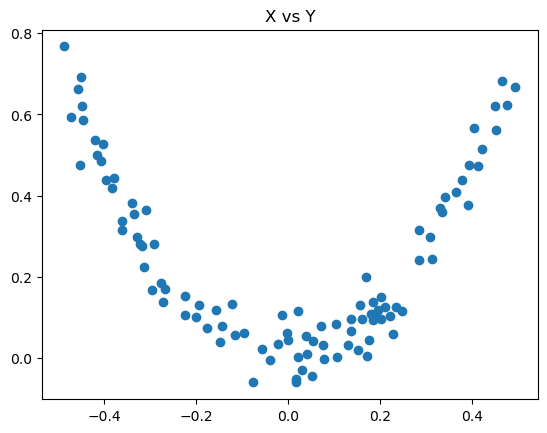

In [6]:
plt.scatter(df['x'], df['y'])
plt.title("X vs Y")

In [7]:
df['pred1'] = df['y'].mean()

In [8]:
df.head()

,x,y,pred1
0,0.016399,-0.051532,0.236808
1,0.070668,0.079620,0.236808
2,-0.471526,0.593634,0.236808
3,-0.328478,0.298989,0.236808
4,0.185277,0.094856,0.236808


In [9]:
df['res1'] = df['y'] - df['pred1']

In [10]:
df.head()

,x,y,pred1,res1
0,0.016399,-0.051532,0.236808,-0.288340
1,0.070668,0.079620,0.236808,-0.157188
2,-0.471526,0.593634,0.236808,0.356826
3,-0.328478,0.298989,0.236808,0.062181
4,0.185277,0.094856,0.236808,-0.141952


Text(0.5, 1.0, 'X vs Y')

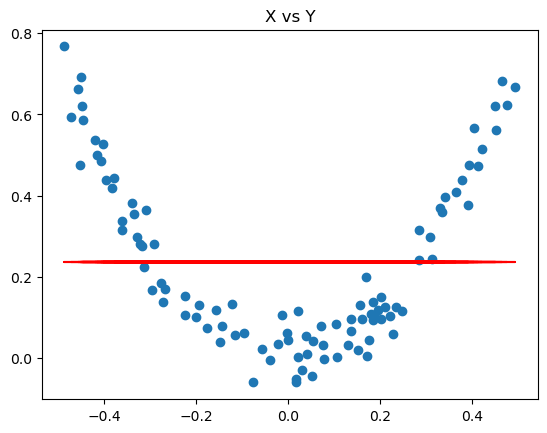

In [11]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], color='red')
plt.title("X vs Y")

In [13]:
# Build DT model
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

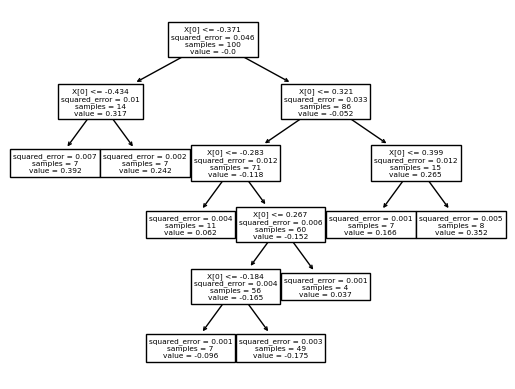

In [14]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [15]:
x_test = np.linspace(-0.5,0.5,500)
x_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [16]:
y_pred = 0.236 + tree1.predict(x_test.reshape(500,1))

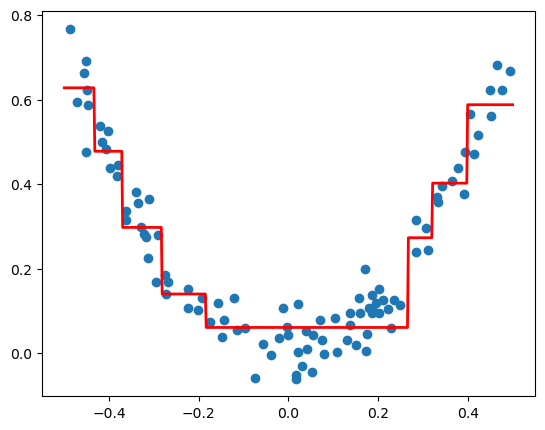

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])

In [18]:
df['pred2'] = 0.236 + tree1.predict(df['x'].values.reshape(100,1))
df.head()

,x,y,pred1,res1,pred2
0,0.016399,-0.051532,0.236808,-0.288340,0.061133
1,0.070668,0.079620,0.236808,-0.157188,0.061133
2,-0.471526,0.593634,0.236808,0.356826,0.627684
3,-0.328478,0.298989,0.236808,0.062181,0.297689
4,0.185277,0.094856,0.236808,-0.141952,0.061133


In [19]:
df['res2'] = df['y'] - df['pred2']

In [20]:
df.head()

,x,y,pred1,res1,pred2,res2
0,0.016399,-0.051532,0.236808,-0.288340,0.061133,-0.112665
1,0.070668,0.079620,0.236808,-0.157188,0.061133,0.018487
2,-0.471526,0.593634,0.236808,0.356826,0.627684,-0.034050
3,-0.328478,0.298989,0.236808,0.062181,0.297689,0.001301
4,0.185277,0.094856,0.236808,-0.141952,0.061133,0.033723


In [21]:
dtree2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtree2.fit(df['x'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [22]:
y_pred = 0.236 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [tree1, dtree2] )

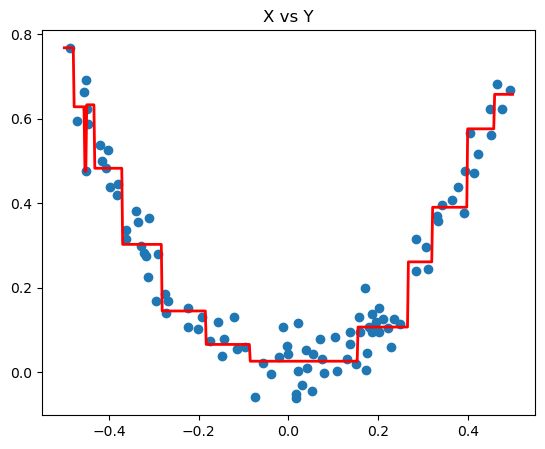

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])
plt.title('X vs Y')
plt.show()